In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import tensorflow as tf

from matplotlib import pyplot as plt
from tensorflow.keras.applications.vgg16 import VGG16, preprocess_input, decode_predictions # type: ignore
from tensorflow.keras.layers import Input, Conv2D, MaxPooling2D, Dense, Flatten # type: ignore
from tensorflow.keras.models import Model # type: ignore
from tensorflow.keras.preprocessing import image # type: ignore
from PIL import Image

In [2]:
data_dir = r'D:\Funiversity\Sem5\ML\UAS\dataset'
data = tf.keras.utils.image_dataset_from_directory(data_dir, image_size=(224, 224), batch_size=16)

print(data.class_names)
class_names = data.class_names

Found 300 files belonging to 3 classes.
['Fuji Apple', 'Golden Delicious Apple', 'Granny Smith Apple']


In [3]:
data_iterator = data.as_numpy_iterator()
print("data_iterator", data_iterator)

batch = data_iterator.next()
print("batch", batch)

data_iterator NumpyIterator(iterator=<tensorflow.python.data.ops.iterator_ops.OwnedIterator object at 0x0000025B597605C0>)
batch (array([[[[115.154015  , 137.29018   ,   1.        ],
         [107.26847   , 131.82143   ,   1.0497249 ],
         [ 98.63123   , 125.22722   ,   1.8830122 ],
         ...,
         [ 91.44033   , 109.57792   ,  58.977802  ],
         [ 91.83767   , 109.934555  ,  57.952503  ],
         [ 95.9979    , 109.131874  ,  52.328037  ]],

        [[126.596985  , 150.56958   ,   2.8944714 ],
         [118.94344   , 143.01302   ,  13.581074  ],
         [118.08705   , 141.80495   ,  30.372252  ],
         ...,
         [ 92.312256  , 109.297554  ,  61.515278  ],
         [ 88.977684  , 105.85413   ,  54.379482  ],
         [ 94.05589   , 107.189865  ,  50.38603   ]],

        [[135.68974   , 160.55582   ,   5.757613  ],
         [133.33293   , 156.93115   ,  31.32228   ],
         [140.13399   , 161.80363   ,  64.15631   ],
         ...,
         [ 92.63152   , 106.2

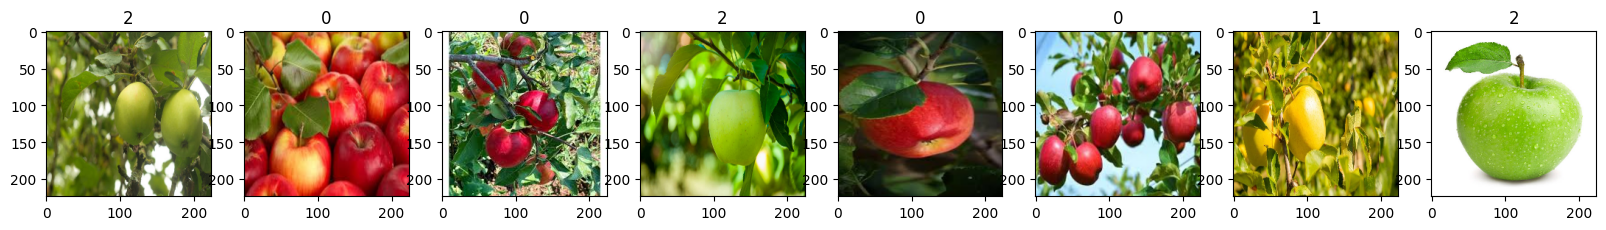

In [4]:
fig, ax = plt.subplots(ncols=8, figsize=(20,20))
for idx, img in enumerate(batch[0][:8]):
    ax[idx].imshow(img.astype(int))
    ax[idx].title.set_text(batch[1][idx])

In [5]:
data = data.map(lambda x, y: (x / 255.0, y))

print("Tipe data setelah normalisasi: {}".format(data.element_spec))
print("Bentuk data setelah normalisasi: {}".format(data.element_spec))
print("Jumlah data", len(data))

Tipe data setelah normalisasi: (TensorSpec(shape=(None, 224, 224, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.int32, name=None))
Bentuk data setelah normalisasi: (TensorSpec(shape=(None, 224, 224, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.int32, name=None))
Jumlah data 19


In [6]:
train_size = int(len(data) * 0.8)
val_size = int(len(data) * 0.1)
test_size = int(len(data) * 0.1)

print(train_size)
print(val_size)
print(test_size)

train = data.take(train_size)
val = data.skip(train_size).take(val_size)
test = data.skip(train_size + val_size).take(test_size)

15
1
1


In [7]:
from tensorflow.keras.models import Sequential # type: ignore
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout # type: ignore


def vgg_16():
    model = Sequential()

    model.add(Conv2D(64, (3, 3), padding='same', activation='relu', input_shape=(227, 227, 3)))
    model.add(Conv2D(64, (3, 3), padding='same', activation='relu'))
    model.add(MaxPooling2D(pool_size=(2, 2), strides=(2, 2)))

    model.add(Conv2D(128, (3, 3), padding='same', activation='relu'))
    model.add(Conv2D(128, (3, 3), padding='same', activation='relu'))
    model.add(MaxPooling2D(pool_size=(2, 2), strides=(2, 2)))

    model.add(Conv2D(256, (3, 3), padding='same', activation='relu'))
    model.add(Conv2D(256, (3, 3), padding='same', activation='relu'))
    model.add(Conv2D(256, (3, 3), padding='same', activation='relu'))
    model.add(MaxPooling2D(pool_size=(2, 2), strides=(2, 2)))

    model.add(Conv2D(512, (3, 3), padding='same', activation='relu'))
    model.add(Conv2D(512, (3, 3), padding='same', activation='relu'))
    model.add(Conv2D(512, (3, 3), padding='same', activation='relu'))
    model.add(MaxPooling2D(pool_size=(2, 2), strides=(2, 2)))

    model.add(Conv2D(512, (3, 3), padding='same', activation='relu'))
    model.add(Conv2D(512, (3, 3), padding='same', activation='relu'))
    model.add(Conv2D(512, (3, 3), padding='same', activation='relu'))
    model.add(MaxPooling2D(pool_size=(2, 2), strides=(2, 2)))

    model.add(Flatten())
    model.add(Dense(4096, activation='relu'))
    model.add(Dropout(0.5))
    model.add(Dense(4096, activation='relu'))
    model.add(Dropout(0.5))
    model.add(Dense(3, activation='softmax'))

    return model

model = vgg_16()

model.compile(optimizer='adamax', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
model.summary()

C:\Users\M S I\AppData\Roaming\Python\Python312\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 227, 227, 64)   │         1,792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 227, 227, 64)   │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 113, 113, 64)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 113, 113, 128)  │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 113, 113, 128)  │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 56, 56, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_4 (Conv2D)               │ (None, 56, 56, 256)    │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_5 (Conv2D)               │ (None, 56, 56, 256)    │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_6 (Conv2D)               │ (None, 56, 56, 256)    │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 28, 28, 256)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_7 (Conv2D)               │ (None, 28, 28, 512)    │     1,180,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_8 (Conv2D)               │ (None, 28, 28, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_9 (Conv2D)               │ (None, 28, 28, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 14, 14, 512)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_10 (Conv2D)              │ (None, 14, 14, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_11 (Conv2D)              │ (None, 14, 14, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_12 (Conv2D)              │ (None, 14, 14, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_4 (MaxPooling2D)  │ (None, 7, 7, 512)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 25088)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 4096)           │   102,764,544 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 4096)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 4096)           │    16,781,312 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 4096)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 3)              │        12,291 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 134,272,835 (512.21 MB)

 Trainable params: 134,272,835 (512.21 MB)

 Non-trainable params: 0 (0.00 B)

In [8]:
history = model.fit(train, epochs = 30, validation_data=val)

Epoch 1/30
15/15 ━━━━━━━━━━━━━━━━━━━━ 72s 5s/step - accuracy: 0.3534 - loss: 10.5359 - val_accuracy: 0.1875 - val_loss: 1.1098
Epoch 2/30
15/15 ━━━━━━━━━━━━━━━━━━━━ 82s 6s/step - accuracy: 0.3737 - loss: 1.0982 - val_accuracy: 0.4375 - val_loss: 1.0891
Epoch 3/30
15/15 ━━━━━━━━━━━━━━━━━━━━ 199s 13s/step - accuracy: 0.3001 - loss: 1.1000 - val_accuracy: 0.3750 - val_loss: 1.0985
Epoch 4/30
15/15 ━━━━━━━━━━━━━━━━━━━━ 145s 10s/step - accuracy: 0.3246 - loss: 1.0986 - val_accuracy: 0.3125 - val_loss: 1.1033
Epoch 5/30
15/15 ━━━━━━━━━━━━━━━━━━━━ 180s 12s/step - accuracy: 0.3077 - loss: 1.0992 - val_accuracy: 0.3125 - val_loss: 1.0994
Epoch 6/30
15/15 ━━━━━━━━━━━━━━━━━━━━ 68s 5s/step - accuracy: 0.2863 - loss: 1.0989 - val_accuracy: 0.3750 - val_loss: 1.0968
Epoch 7/30
15/15 ━━━━━━━━━━━━━━━━━━━━ 69s 5s/step - accuracy: 0.3274 - loss: 1.0980 - val_accuracy: 0.4375 - val_loss: 1.0105
Epoch 8/30
15/15 ━━━━━━━━━━━━━━━━━━━━ 70s 5s/step - accuracy: 0.4223 - loss: 0.9220 - val_accuracy: 0.6250 - va

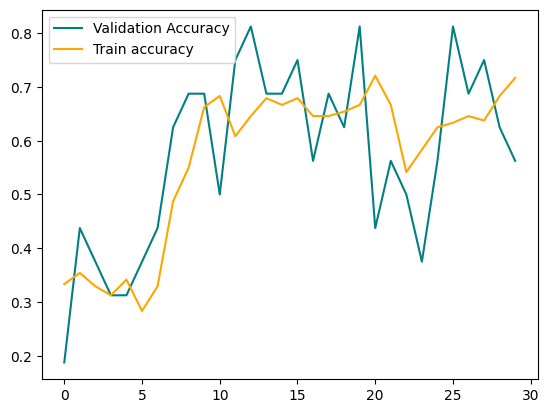

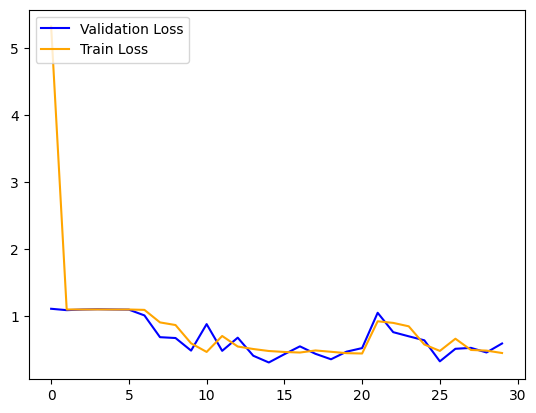

In [12]:
fig = plt.figure()
plt.plot(history.history['val_accuracy'], color='teal', label='Validation Accuracy')
plt.plot(history.history['accuracy'], color='orange', label='Train accuracy')
plt.legend(loc="upper left")
plt.show()

fig = plt.figure()
plt.plot(history.history['val_loss'], color = 'blue', label = 'Validation Loss')
plt.plot(history.history['loss'], color = 'orange', label = 'Train Loss')
plt.legend(loc = "upper left")
plt.show()

In [13]:
model.evaluate(test)

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step - accuracy: 0.6875 - loss: 0.3306


[0.33059555292129517, 0.6875]

In [11]:
model.save(r'D:\Funiversity\Sem5\ML\UAS\Projek UAS PMDPM_B_Pytroch\BestModel_VGG-16 CNN_PyTorch.h5')